# Imports

In [27]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm  # Use the notebook-friendly version

# !pip install plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'inline' or 'iframe' depending on environment

import IPython
import torch
from speechbrain.dataio.dataio import read_audio, write_audio
from loquacious_set_prepare import load_datasets


# Load data

In [2]:
mel_sm_path = "/local_disk/apollon/rwhetten/sss_data_selection/save/mel_small_ckpt.pkl"
speaker_sm_path = "/local_disk/apollon/rwhetten/sss_data_selection/save/speaker_small_ckpt.pkl"

with open(mel_sm_path, "rb") as f:
    mel_sm = pickle.load(f)

with open(speaker_sm_path, "rb") as f:
    speaker = pickle.load(f)

In [3]:
# # load in
# mel_lg_path = "/local_disk/apollon/rwhetten/sss_data_selection/save/mel_large_ckpt.pkl"
# speaker_lg_path = "/local_disk/apollon/rwhetten/sss_data_selection/save/speaker_large_ckpt.pkl"

# with open(mel_lg_path, "rb") as f:
#     mel_lg = pickle.load(f)

# with open(speaker_lg_path, "rb") as f:
#     speaker_lg = pickle.load(f)

# MFCCs + ' + "

In [4]:
df = pd.DataFrame.from_dict(mel_sm['results']).T
df.head()

0          1   \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_... -176.562302  26.683651   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov... -179.311951  45.110302   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov...  -66.863861  49.977825   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov... -157.180038  32.016926   
2001_Peters_Township_High_School_Commencement_S... -107.322075  20.401213   

                                                           2          3   \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_...  -6.352055  -0.464122   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov...  16.274731  -3.144705   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov...  -6.973994  -7.477206   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov...  -5.257993  22.200352   
2001_Peters_Township_High_School_Commencement_S...  -0.386503   2.790566   

                                                           4          5   \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_... -16.242033  -1.202740   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov... -14.121726  -9.966835   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov...  -7.450747 -15.938499   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov...   5.295175  -1.464930   
2001_Peters_Township_High_School_Commencement_S... -10.317942 -12.523396   

                                                           6         7   \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_...  -0.789402 -3.812416   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov...  -8.197394 -5.652992   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov... -10.364438 -8.610475   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov...  -1.473917 -5.424051   
2001_Peters_Township_High_School_Commencement_S...  -5.122077 -3.403278   

                                                           8          9   ...  \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_...  -0.188787  -0.583748  ...   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov... -11.520189  -0.220401  ...   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov...  -1.792132 -13.482720  ...   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov...   4.731476   5.643916  ...   
2001_Peters_Township_High_School_Commencement_S...  -4.285184  -5.297654  ...   

                                                          29        30  \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_... -0.013447 -0.013044   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov...  0.011931  0.022920   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov...  0.025667 -0.018959   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov... -0.009274  0.013653   
2001_Peters_Township_High_School_Commencement_S... -0.007218 -0.006393   

                                                          31        32  \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_... -0.018236  0.002808   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov...  0.013758  0.006725   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov... -0.003851  0.003783   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov...  0.036312  0.002322   
2001_Peters_Township_High_School_Commencement_S...  0.009298 -0.011063   

                                                          33        34  \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_...  0.002269  0.018798   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov...  0.012314  0.025411   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov... -0.004572 -0.004145   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov... -0.022549 -0.012256   
2001_Peters_Township_High_School_Commencement_S... -0.010359 -0.010222   

                                                          35        36  \
rugby_vsXaverian_050615_SLASH_rugby_vsXaverian_...  0.007902  0.000677   
gov_DOT_uscourts_DOT_ca5_DOT_18-30469_SLASH_gov...  0.016908 -0.001804   
gov_DOT_uscourts_DOT_ca10_DOT_19-3108_SLASH_gov...  0.014276  0.019415   
gov_DOT_uscourts_DOT_ca9_DOT_02-50579_SLASH_gov... -0.035243  0.001127   
2001_Peters_Township_High_School_Commenc

In [5]:
len(df)

107303

In [6]:
k=10

In [6]:
# with open('mel_lg.npy', 'wb') as f:
#     np.save(f, np.array(df))

# mel_lg_np = "/local_disk/apollon/rwhetten/sss_data_selection/save/mel_lg.npy"
# np.load(mel_lg_np)

In [7]:
k=10
mb_kmeans = MiniBatchKMeans(n_clusters=k,
                            random_state=42,
                            batch_size=64 * k,
                            init='k-means++', n_init=1, init_size=100000,
                            reassignment_ratio=5e-4,
                            verbose=2)

mb_kmeans.fit(df)
predictions = mb_kmeans.labels_
cluster_centers = mb_kmeans.cluster_centers_

Init 1/1 with method k-means++
Inertia for init 1/1: 91701128.0
Minibatch step 1/1482480: mean batch inertia: 897.0310546875
Minibatch step 2/1482480: mean batch inertia: 616.39267578125, ewa inertia: 616.39267578125
Minibatch step 3/1482480: mean batch inertia: 639.80341796875, ewa inertia: 616.3958341020708
Minibatch step 4/1482480: mean batch inertia: 608.22548828125, ewa inertia: 616.3947318485364
Minibatch step 5/1482480: mean batch inertia: 586.56572265625, ewa inertia: 616.3907076454572
Minibatch step 6/1482480: mean batch inertia: 588.52314453125, ewa inertia: 616.3869480591909
Minibatch step 7/1482480: mean batch inertia: 620.271923828125, ewa inertia: 616.3874721775534
Minibatch step 8/1482480: mean batch inertia: 574.823876953125, ewa inertia: 616.3818648727043
Minibatch step 9/1482480: mean batch inertia: 573.807763671875, ewa inertia: 616.3761212414612
Minibatch step 10/1482480: mean batch inertia: 582.5794921875, ewa inertia: 616.371561770584
Minibatch step 11/1482480: me

In [8]:
limit = 100000

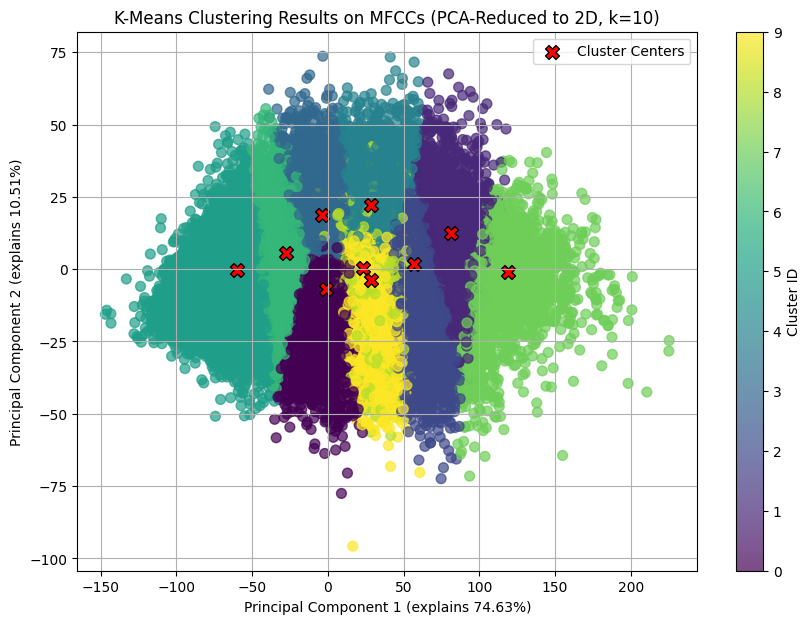

In [9]:
pca_2d = PCA(n_components=2, random_state=42)
d_pca_2d = pca_2d.fit_transform(df[:limit])
cluster_centers_pca_2d = pca_2d.transform(cluster_centers)

plt.figure(figsize=(10, 7))
# Scatter plot of PCA-reduced data points, colored by their assigned cluster
scatter_2d = plt.scatter(d_pca_2d[:, 0], d_pca_2d[:, 1], c=predictions[:limit], cmap='viridis', s=50, alpha=0.7)
# Plot the PCA-reduced cluster centers
plt.scatter(cluster_centers_pca_2d[:, 0], cluster_centers_pca_2d[:, 1], marker='X', s=100, color='red',
            edgecolor='black', label='Cluster Centers')
plt.title(f'K-Means Clustering Results on MFCCs (PCA-Reduced to 2D, k={k})')
plt.xlabel(f'Principal Component 1 (explains {pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 (explains {pca_2d.explained_variance_ratio_[1]*100:.2f}%)')
plt.colorbar(scatter_2d, label='Cluster ID')
plt.legend()
plt.grid(True)
# plt.show()
# plt.savefig('mel_lg_kmeans_10_pca_2.svg')

In [7]:
# Fit KMeans
mb_kmeans = MiniBatchKMeans(
    n_clusters=k,
    random_state=42,
    batch_size=64 * k,
    init='k-means++',
    n_init=1,
    init_size=100000,
    reassignment_ratio=5e-4,
    verbose=2
)
mb_kmeans.fit(df)
predictions = mb_kmeans.labels_
cluster_centers = mb_kmeans.cluster_centers_


Init 1/1 with method k-means++
Inertia for init 1/1: 97353792.0
Minibatch step 1/16766: mean batch inertia: 940.1345703125
Minibatch step 2/16766: mean batch inertia: 649.08251953125, ewa inertia: 649.08251953125
Minibatch step 3/16766: mean batch inertia: 592.698388671875, ewa inertia: 648.4099286912068
Minibatch step 4/16766: mean batch inertia: 611.136181640625, ewa inertia: 647.9653003807548
Minibatch step 5/16766: mean batch inertia: 618.75234375, ewa inertia: 647.6168270294597
Minibatch step 6/16766: mean batch inertia: 625.614599609375, ewa inertia: 647.3543684901908
Minibatch step 7/16766: mean batch inertia: 638.636279296875, ewa inertia: 647.2503727941548
Minibatch step 8/16766: mean batch inertia: 614.322705078125, ewa inertia: 646.8575876726633
Minibatch step 9/16766: mean batch inertia: 631.818408203125, ewa inertia: 646.6781894235671
Minibatch step 10/16766: mean batch inertia: 591.22255859375, ewa inertia: 646.0166744058401
Minibatch step 11/16766: mean batch inertia: 61

In [8]:
# PCA
limit = 1000
pca_2d = PCA(n_components=2, random_state=42)
d_pca_2d = pca_2d.fit_transform(df[:limit])
cluster_centers_pca_2d = pca_2d.transform(cluster_centers)

In [9]:
# pd.DataFrame.from_dict({
#     'id': df[:limit].index,
#     'pc1': d_pca_2d[:, 0],
#     'pc2': d_pca_2d[:, 1],
# })

In [10]:
# plot_df = 
# fig = px.scatter(df[:limit], y=d_pca_2d[:, 0], x=d_pca_2d[:, 1])
# fig.update_traces(marker_size=10)
# fig.show()

In [11]:
# Build hover info with index
hover_text = [f"Index: {i}" for i in range(limit)]

# Create scatter plot
fig = go.Figure()

# Add data points
fig.add_trace(go.Scatter(
    x=d_pca_2d[:, 0],
    y=d_pca_2d[:, 1],
    mode='markers',
    marker=dict(
        size=6,
        color=predictions[:limit],
        colorscale='Viridis',
        opacity=0.7,
        colorbar=dict(title='Cluster ID')
    ),
    text=hover_text,
    hoverinfo='text',
    name='Data Points'
))

# Add cluster centers
fig.add_trace(go.Scatter(
    x=cluster_centers_pca_2d[:, 0],
    y=cluster_centers_pca_2d[:, 1],
    mode='markers',
    marker=dict(
        size=14,
        symbol='x',
        color='red',
        line=dict(width=2, color='black')
    ),
    name='Cluster Centers'
))

# Layout
fig.update_layout(
    title=f'K-Means Clustering Results on MFCCs (PCA-Reduced to 2D, k={k})',
    xaxis_title=f'Principal Component 1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}%)',
    yaxis_title=f'Principal Component 2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}%)',
    legend=dict(title='Legend'),
    width=900,
    height=700
)

fig.show()

In [13]:
df.iloc[355].name

'gov_DOT_uscourts_DOT_illappct_DOT_4-12-0460_SLASH_gov_DOT_uscourts_DOT_illappct_DOT_4-12-0460_DOT_2014-11-06_DOT_mp3_00000.flac'

### load file from dataset

In [18]:
# load dataset
hf_data_dict = load_datasets(
    "small",
    "speechbrain/LoquaciousSet",
    "/local_disk/apollon/rwhetten/hf_root/datasets",
)

Resolving data files:   0%|          | 0/6323 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/66 [00:00<?, ?it/s]

In [45]:
filename=df.iloc[355].name
filename2=df.iloc[519].name


In [44]:
# Build an ID-to-item index
# id_to_item = {item["ID"]: item for item in hf_data_dict["train"]}
id_to_item = {}
for i, item in enumerate(tqdm(hf_data_dict["train"])):
    id_to_item[item["ID"]] = item
    

  0%|          | 0/107303 [00:00<?, ?it/s]

In [51]:
f = id_to_item.get(filename)
f2 = id_to_item.get(filename2)


In [57]:
sig = read_audio(f2["wav"]["bytes"])


In [58]:
IPython.display.Audio(sig, rate=samplerate)

# Speaker Embeddings

In [27]:
df_speaker = pd.DataFrame.from_dict(speaker_lg['results']).T
df_speaker.head()

0         1    \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS... -0.046254 -0.064087   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.092818 -0.343982   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m... -0.054206 -0.088970   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0...  0.055183 -0.191430   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_... -0.241946 -0.115047   

                                                         2         3    \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS... -0.096097 -0.107513   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac         -0.237657 -0.384233   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m... -0.124893 -0.014069   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0... -0.021690 -0.285761   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_... -0.134957 -0.243144   

                                                         4         5    \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS... -0.050994 -0.032374   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.456225 -0.012949   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m... -0.140625  0.161785   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0...  0.225623 -0.086730   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_...  0.081856 -0.002123   

                                                         6         7    \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS...  0.249068 -0.219559   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.179669 -0.305312   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m...  0.026947 -0.030485   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0...  0.106433 -0.339067   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_...  0.079598  0.109838   

                                                         8         9    ...  \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS...  0.045343  0.027503  ...   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.140377 -0.175030  ...   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m...  0.082166 -0.058114  ...   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0...  0.055312  0.150259  ...   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_... -0.040556  0.000471  ...   

                                                         246       247  \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS... -0.205633 -0.043007   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.054900  0.007778   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m... -0.150152  0.055224   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0... -0.038836  0.299592   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_...  0.121072 -0.130224   

                                                         248       249  \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS... -0.100376 -0.094326   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.040266  0.204871   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m...  0.112032  0.084941   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0...  0.099919  0.070111   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_...  0.012651 -0.470264   

                                                         250       251  \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS... -0.042314 -0.124987   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac          0.114417 -0.367068   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m...  0.036592 -0.088939   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0... -0.025070 -0.167474   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_... -0.252125 -0.141382   

                                                         252       253  \
snafuinfinityfootball_vsWOBURN_092118-CL19_SLAS...  0.033182  0.244299   
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac         -0.240021  0.098663   
texas_terror_1935_SLASH_texas_terror_1935_DOT_m... -0.032801  0.174502   
unfinished_task_SLASH_unfinished_task_DOT_mp3_0... -0.147892  0.332172   
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_...  0.125283  0.044098   

                      

In [33]:
len(df_speaker) == len(df)

True

In [29]:
# with open('speaker_lg.npy', 'wb') as f:
#     np.save(f, np.array(df_speaker))

In [41]:
k=100
mb_kmeans = MiniBatchKMeans(n_clusters=k,
                            random_state=42,
                            batch_size=64 * k,
                            init='k-means++', n_init=1, init_size=100000,
                            reassignment_ratio=5e-4,
                            verbose=2)

mb_kmeans.fit(df_speaker)
predictions = mb_kmeans.labels_
cluster_centers = mb_kmeans.cluster_centers_

Init 1/1 with method k-means++
Inertia for init 1/1: 1168212.375
Minibatch step 1/148248: mean batch inertia: 11.74656005859375
Minibatch step 2/148248: mean batch inertia: 9.169507446289062, ewa inertia: 9.169507446289062
Minibatch step 3/148248: mean batch inertia: 8.937924194335938, ewa inertia: 9.169195019540457
Minibatch step 4/148248: mean batch inertia: 8.830819091796876, ewa inertia: 9.168738519815111
Minibatch step 5/148248: mean batch inertia: 8.780599365234375, ewa inertia: 9.168214884996749
Minibatch step 6/148248: mean batch inertia: 8.750467529296875, ewa inertia: 9.167651306037653
Minibatch step 7/148248: mean batch inertia: 8.723016357421875, ewa inertia: 9.16705145328431
Minibatch step 8/148248: mean batch inertia: 8.783201904296876, ewa inertia: 9.166533605531797
Minibatch step 9/148248: mean batch inertia: 8.763055419921875, ewa inertia: 9.165989276973491
Minibatch step 10/148248: mean batch inertia: 8.670405883789062, ewa inertia: 9.165320690161234
Minibatch step 11

In [50]:
limit = 10000

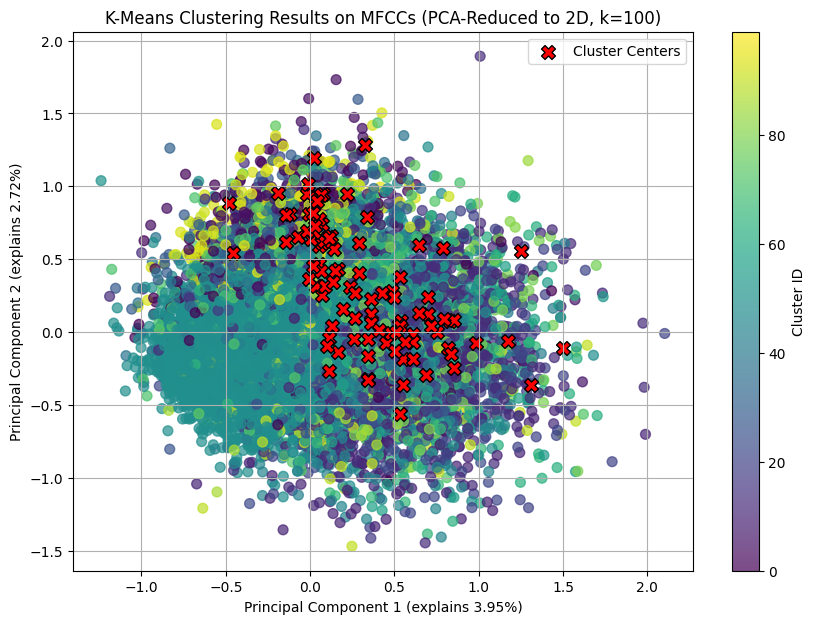

In [51]:
pca_2d = PCA(n_components=2, random_state=42)
d_pca_2d = pca_2d.fit_transform(df_speaker[:limit])
cluster_centers_pca_2d = pca_2d.transform(cluster_centers)

plt.figure(figsize=(10, 7))
# Scatter plot of PCA-reduced data points, colored by their assigned cluster
scatter_2d = plt.scatter(d_pca_2d[:, 0], d_pca_2d[:, 1], c=predictions[:limit], cmap='viridis', s=50, alpha=0.7)
# Plot the PCA-reduced cluster centers
plt.scatter(cluster_centers_pca_2d[:, 0], cluster_centers_pca_2d[:, 1], marker='X', s=100, color='red',
            edgecolor='black', label='Cluster Centers')
plt.title(f'K-Means Clustering Results on MFCCs (PCA-Reduced to 2D, k={k})')
plt.xlabel(f'Principal Component 1 (explains {pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 (explains {pca_2d.explained_variance_ratio_[1]*100:.2f}%)')
plt.colorbar(scatter_2d, label='Cluster ID')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('speaker_lg_kmeans_100_pca_2.svg')